# Cursus Kwantummechanica 1
## $\color{orange}{\text{4.3 Tunneling from a rectangular potential barrier (Hoofdstuk 4)}}$

- Python Jupyter notebook for computing the reflection and transmission coefficient for incoming beams with a fixed energy
- Python versie: November 2015
- Python notebook versie: November 2020, November 2021
- Auteur (en bron van alle eventuele fouten): Jan Ryckebusch
- Potential:

1. $V(x)=0  \; \; x \in  ] -\infty, 0[$    
2. $V(x)=V_0 \; \;  x \in [0,+a] $
3. $V(x)=0 \; \; x \in  [+a,+\infty[ $    

- Opacity of the barrier is defined as: $ \frac {2 m V_0 a^2} {\hbar ^2} $

  (FACTOR OF TWO DIFFERENCE IN COMPARISON WITH DEFINITION IN BRANSDEN and JOACHAIN)
- Wave function is the form:


1. $\infty \lt x \le 0: \psi(x) = \exp (i k x) + B \exp (- i k x) $   
2. $0 < x \le a: \psi(x) = F \exp \kappa x + G \exp - \kappa x$ (kappa can be real or complex)
3. $a < x < + \infty: \psi(x) = C \exp (i k x)$

- Use of dimensionless variables: distances in $\frac{x}{a}$ and use of $(ka)$ and $(\kappa a)$ throughout the whole notebook


In [42]:
import math as m # math for real variables
import numpy as np # load numpy (solves the set of linear equations)
import cmath as cm # math for complex variables
import pylab as plt # pylab allows one to make figures ...
# import time as ttt
# change some plot parameters ... things look better
params = {'legend.fontsize': 'x-large',
#          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.rcParams['font.family'] = "serif"
lines = ["-","--","-.",":"]


In [43]:

# GOOD TO KNOW: solve the system of equations 3 * x0 + x1 = 9 and x0 + 2 * x1 = 8:
#
#a = np.array([[3,1], [1,2]])
#>>> b = np.array([9,8])
#>>> x = np.linalg.solve(a, b)
#>>> x   array([ 2.,  3.])
#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
# this function **findthecoef** determines the wave function at given opacity and EoverV0
# for dispfig = 1: create a plot of the wave function
#
def findthecoef(opacity,EoverV0,dispfig):
    ka=m.sqrt(opacity*EoverV0)
    kappa_a=cm.sqrt(opacity*(1-EoverV0)) # can be real or complex
    expika=cm.exp(complex(0.,ka))
    ekappa_a=cm.exp(kappa_a) # can be real or complex
# right-hand side of the linear equations
    BB=np.array([-1.,complex(0.,-ka),0.,0.])
# condition 1: wave function is continuous at x=0
    C1=np.array([1.,0.,-1.,-1.],dtype=complex)
# condition 2: derivative of wave function is continuous at x=0
    C2=np.array([complex(0.,-ka),0.,-kappa_a,kappa_a],dtype=complex)
# condition 3: wave is continuous at x=a
    C3=np.array([0.,-expika,ekappa_a,1./ekappa_a],dtype=complex)
# condition 4: derivative of wave function is continuous at x=a
    C4=np.array([0,-complex(0.,ka)*expika,kappa_a*ekappa_a,-kappa_a*(1./ekappa_a)],dtype=complex)
# matrix: AA[B,C,F,G] = BB
    AA=np.array([C1,C2,C3,C4],dtype=complex)
#    print(AA)
    XX=np.linalg.solve(AA,BB)
# determine the position probability density
# rrange = list of x/a values
    Psi2=[]
    PsiRe=[] # real part of wave function
    PsiIm=[] # imaginary part of wave function
    rrange=[]
# wave function in left side of the barrier (complex for all values of E/V_0)
    for rr in np.arange(-10.,0.0,0.05):
        rrange.append(rr)
        Psi=1.*cm.exp(complex(0.,ka*rr))+XX[0]*cm.exp(complex(0.,-ka*rr))
        Psi2.append((Psi*Psi.conjugate()).real) # \Psi \times \Psi ^ *
        PsiRe.append(Psi.real) # real part of the wave function
        PsiIm.append(Psi.imag) # imaginary part of the wave function
# wave function in the barrier (real for E/V_0 < 1 ; complex for E/V_0 > 1)
    for rr in np.arange(0.,1.,0.05):
        rrange.append(rr)
        Psi=XX[2]*cm.exp(kappa_a*rr)+XX[3]*cm.exp(-kappa_a*rr)
        Psi2.append((Psi*Psi.conjugate()).real) # \Psi \times \Psi ^ *
        PsiRe.append(Psi.real) # real part of the wave function
        PsiIm.append(Psi.imag) # imaginary part of the wave function
# wave function in right side of the barrier
    for rr in np.arange(1.,5.0,0.05):
        rrange.append(rr)
        Psi=XX[1]*cm.exp(complex(0.,ka*rr))
        Psi2.append((Psi*Psi.conjugate()).real) # \Psi \times \Psi ^ *
        PsiRe.append(Psi.real) # real part of the wave function
        PsiIm.append(Psi.imag) # imaginary part of the wave function
# plot the wave function if dispfig == 1:
    if dispfig == 1:
        plotthewavefunction(rrange,Psi2,PsiRe,PsiIm,opacity,EoverV0)
# compute the reflection and transmission coefficient
    Reflec=(XX[0]*XX[0].conjugate()).real # reflection coefficient
    Transm=(XX[1]*XX[1].conjugate()).real # transmission coefficient
    return XX,Reflec,Transm


In [44]:
#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
# with the function **plotthewavefunction** one can plot the wavefunction
#
def plotthewavefunction(rrange,Psi2,PsiRe,PsiIm,opacity,EoverV0):
    plt.figure(figsize=(22,6))
#    my_dpi=96
#    plt.figure(figsize=(1.3*800/my_dpi, 2.*1.3*800/my_dpi), dpi=my_dpi)
#    plt.figure()
    plt.subplot(121) # figure with 1 row1 and 2 columns, figure left
# plt.axis([yinit[0], maxofx, yinit[2], maxofz])
    plt.xlabel('x/a',fontsize=16)
    plt.ylabel('waarschijnlijkheidsdichtheid $P(x,t)$',fontsize=16)
    plt.title(r'Tunneling on rectangular barrier for $E/V_0$='+str(EoverV0)+' and Opacity='+str(opacity),color='coral',fontsize=18,fontweight='bold')
    plt.plot(rrange, Psi2, linestyle='-', color='dodgerblue',linewidth=3.0)
    dt=np.array(Psi2)
    plt.plot(rrange,dt-dt,'--',alpha=0.4,color='slategray')
    plt.plot(rrange,1.+dt-dt,'--',alpha=0.4,color='slategray')
    plt.axvspan(0., 1., alpha=0.3, color='darkslateblue')
    plt.subplot(122) # figure with 1 row and 2 columns, figure right
    plt.xlabel(r'$x/a$',fontsize=16)
    plt.ylabel('$\Psi(x/a)$ (real, imaginary part)',fontsize=16)
    plt.plot(rrange, PsiRe, linestyle='-', linewidth=3., color='darkkhaki', label=r'$Re \Psi(x/a)$')
    plt.plot(rrange, PsiIm, linestyle='--', linewidth=3., color='chocolate', label=r'$Im \Psi(x/a)$')
    plt.axvspan(0., 1., alpha=0.3, color='darkslateblue')
    plt.legend(frameon=False,fontsize=22,ncol=1,loc='best')
    plt.show()
# animation ... better ways to do this these days ...
#    plt.draw()
#    ttt.sleep(2.5)  # pause xx seconds between subsequent plots ....
#    plt.pause(2.5)
#    plt.clf()  # clears the entire current figure
#    plt.cla()  # clears the currently active axis
    plt.close() # closes the currently active window
#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


In [45]:
#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
# function that does the computation of the transmission and reflection coefficient for a given opacity
#    and a range of E/V_0 values (no wave functions are plotted)
#
# Run over E/V_0 at fixed values of the opacity
#
def ComputeAndPlotTransmission(opacity):
  EV0=[] ; VecReflec=[] ; VecTransm=[] ; VecClassic=[]
  dispfig=int(0)  # Put dispfig zero here!
#
# E/V0 between 0.1 and 0.95
  for EoverV0 in np.arange(0.1,1.0,0.1):
      EV0.append(EoverV0)
      XX,Reflec,Transm=findthecoef(opacity,EoverV0,dispfig)
      VecReflec.append(Reflec)
      VecTransm.append(Transm)
      VecClassic.append(0)
# E/V0 between 0.96 and 0.99
  for EoverV0 in np.arange(0.96,0.99,0.01):
      EV0.append(EoverV0)
      XX,Reflec,Transm=findthecoef(opacity,EoverV0,dispfig)
      VecReflec.append(Reflec)
      VecTransm.append(Transm)
      VecClassic.append(0)

# E/V0 between 1.01 and 5
  for EoverV0 in np.arange(1.01,5.,0.01):
      EV0.append(EoverV0)
      XX,Reflec,Transm=findthecoef(opacity,EoverV0,dispfig)
      VecReflec.append(Reflec)
      VecTransm.append(Transm)
      VecClassic.append(1)

  for tt in range(0,len(EV0),50): # for some selected E/V_0 ... print info
    print('######################################')
    print(' Opacity= ',opacity, ' EoverV0=', EV0[tt])
    print(' Numerically computed Reflection coefficient= %5.3f ' % (VecReflec[tt]))
    print(' Numerically computed Transmission coeffient= %5.3f'% (VecTransm[tt]))
# check whether the numerical solution = analytical solution
    if EV0[tt] < 1. :
        PPP = (1+(m.sinh(m.sqrt(opacity*(1.-EV0[tt]))))**2
               /4./EV0[tt]/(1.-EV0[tt]))
        print(" Analytically predicted transmission coefficient=%5.3f" % (1./PPP))
    if EV0[tt] > 1. :
        PPP = (1+(m.sin(m.sqrt(opacity*(EV0[tt]-1.))))**2
               /4./EV0[tt]/(EV0[tt]-1.))
        print(" Analytically predicted transmission coefficent=%5.3f" % (1./PPP))

# Plot the Transmission Coefficient as a function of E/V_0

  plt.figure(figsize=(12,6))
  plt.plot(EV0, VecTransm,color='darkkhaki',linestyle='-',linewidth=3.0)
  plt.plot(EV0,VecClassic,color='chocolate',linestyle='--',linewidth=3.0)
  plt.axis([EV0[0], 1.*EV0[len(EV0)-1], -0.1, 1.2])
  plt.xlabel('$E/V_0$',fontsize=16)
  plt.ylabel('Transmission coefficient $T$',fontsize=16)
  plt.title(r'Tunneling on rectangular barrier (Opacity='+str(opacity)+')',color='coral',fontsize=20,fontweight='bold')
  plt.draw()




######################################
 Opacity=  20.0  EoverV0= 0.1
 Numerically computed Reflection coefficient= 1.000 
 Numerically computed Transmission coeffient= 0.000
 Analytically predicted transmission coefficient=0.000
######################################
 Opacity=  20.0  EoverV0= 1.3800000000000003
 Numerically computed Reflection coefficient= 0.063 
 Numerically computed Transmission coeffient= 0.937
 Analytically predicted transmission coefficent=0.937
######################################
 Opacity=  20.0  EoverV0= 1.8800000000000008
 Numerically computed Reflection coefficient= 0.102 
 Numerically computed Transmission coeffient= 0.898
 Analytically predicted transmission coefficent=0.898
######################################
 Opacity=  20.0  EoverV0= 2.3800000000000012
 Numerically computed Reflection coefficient= 0.053 
 Numerically computed Transmission coeffient= 0.947
 Analytically predicted transmission coefficent=0.947
######################################
 Op

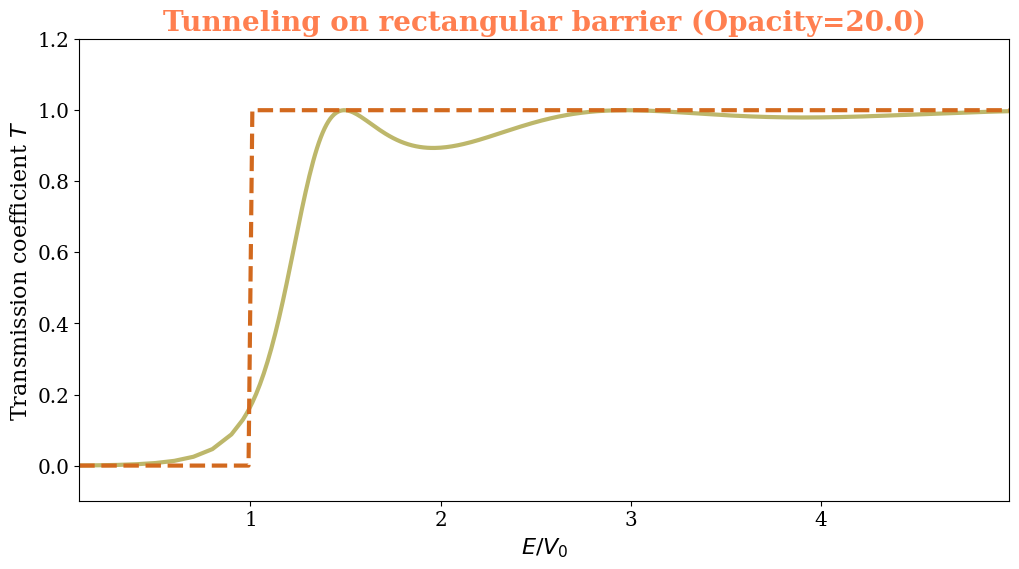

In [46]:
# energy dependence of the transmission coefficient in an extreme quantum mechanical situation (small opacity)

opacity=float(20.) # Input: the opacity of the problem at hand?

ComputeAndPlotTransmission(opacity)







######################################
 Opacity=  2000.0  EoverV0= 0.1
 Numerically computed Reflection coefficient= 1.000 
 Numerically computed Transmission coeffient= 0.000
 Analytically predicted transmission coefficient=0.000
######################################
 Opacity=  2000.0  EoverV0= 1.3800000000000003
 Numerically computed Reflection coefficient= 0.167 
 Numerically computed Transmission coeffient= 0.833
 Analytically predicted transmission coefficent=0.833
######################################
 Opacity=  2000.0  EoverV0= 1.8800000000000008
 Numerically computed Reflection coefficient= 0.108 
 Numerically computed Transmission coeffient= 0.892
 Analytically predicted transmission coefficent=0.892
######################################
 Opacity=  2000.0  EoverV0= 2.3800000000000012
 Numerically computed Reflection coefficient= 0.043 
 Numerically computed Transmission coeffient= 0.957
 Analytically predicted transmission coefficent=0.957
##################################

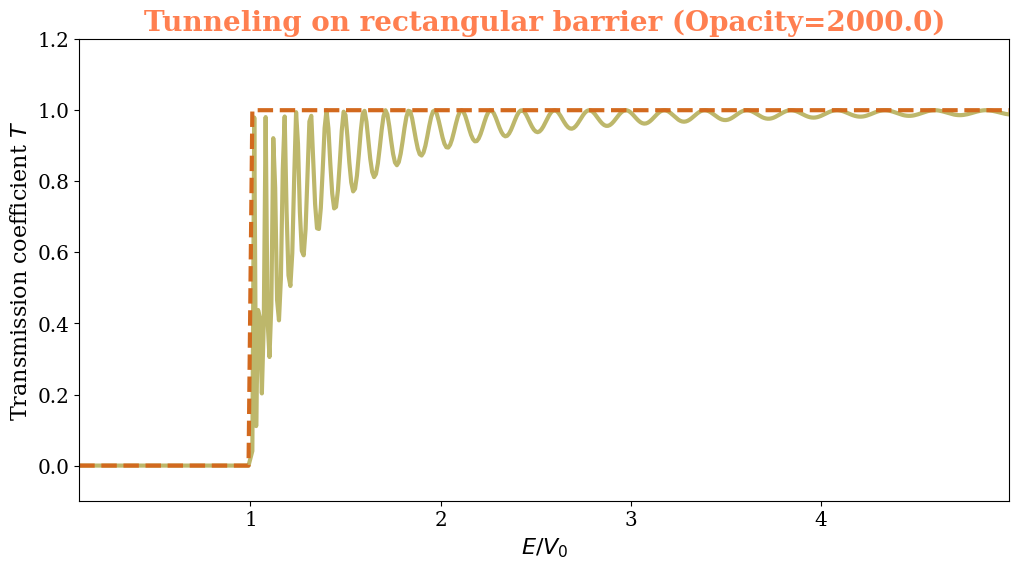

In [47]:
# energy dependence of the transmission coefficient in a quantum mechanical situation (opacity in the thousands)

opacity=float(2000.) # Input: the opacity of the problem at hand?

ComputeAndPlotTransmission(opacity)

######################################
 Opacity=  20000.0  EoverV0= 0.1
 Numerically computed Reflection coefficient= 1.000 
 Numerically computed Transmission coeffient= 0.000
 Analytically predicted transmission coefficient=0.000
######################################
 Opacity=  20000.0  EoverV0= 1.3800000000000003
 Numerically computed Reflection coefficient= 0.193 
 Numerically computed Transmission coeffient= 0.807
 Analytically predicted transmission coefficent=0.807
######################################
 Opacity=  20000.0  EoverV0= 1.8800000000000008
 Numerically computed Reflection coefficient= 0.061 
 Numerically computed Transmission coeffient= 0.939
 Analytically predicted transmission coefficent=0.939
######################################
 Opacity=  20000.0  EoverV0= 2.3800000000000012
 Numerically computed Reflection coefficient= 0.010 
 Numerically computed Transmission coeffient= 0.990
 Analytically predicted transmission coefficent=0.990
##############################

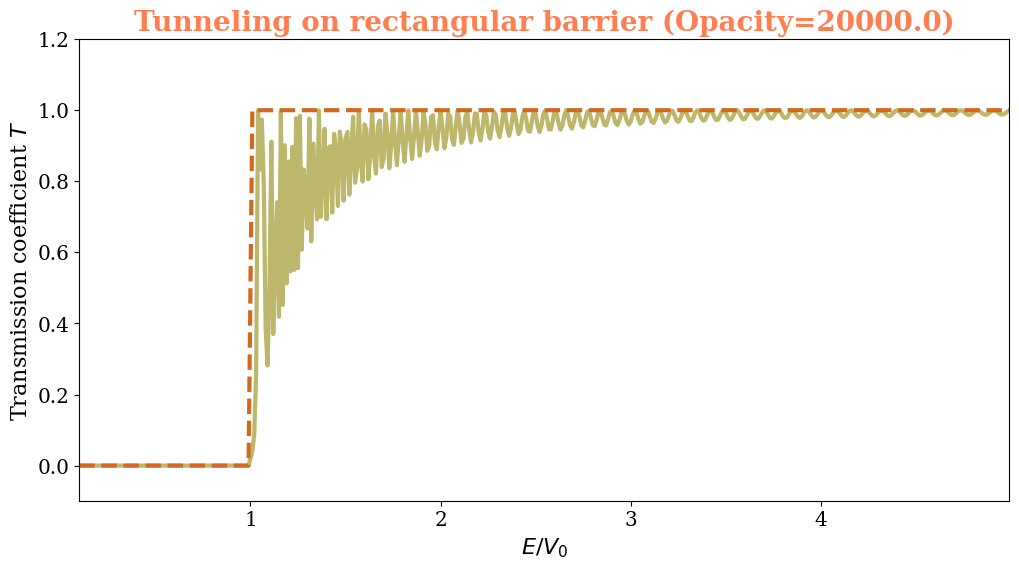

In [48]:
# energy dependence of the transmission coefficient in a situation approaching a classical one (opacity in the ten thousands)

opacity=float(20000.) # Input: the opacity of the problem at hand?

ComputeAndPlotTransmission(opacity)

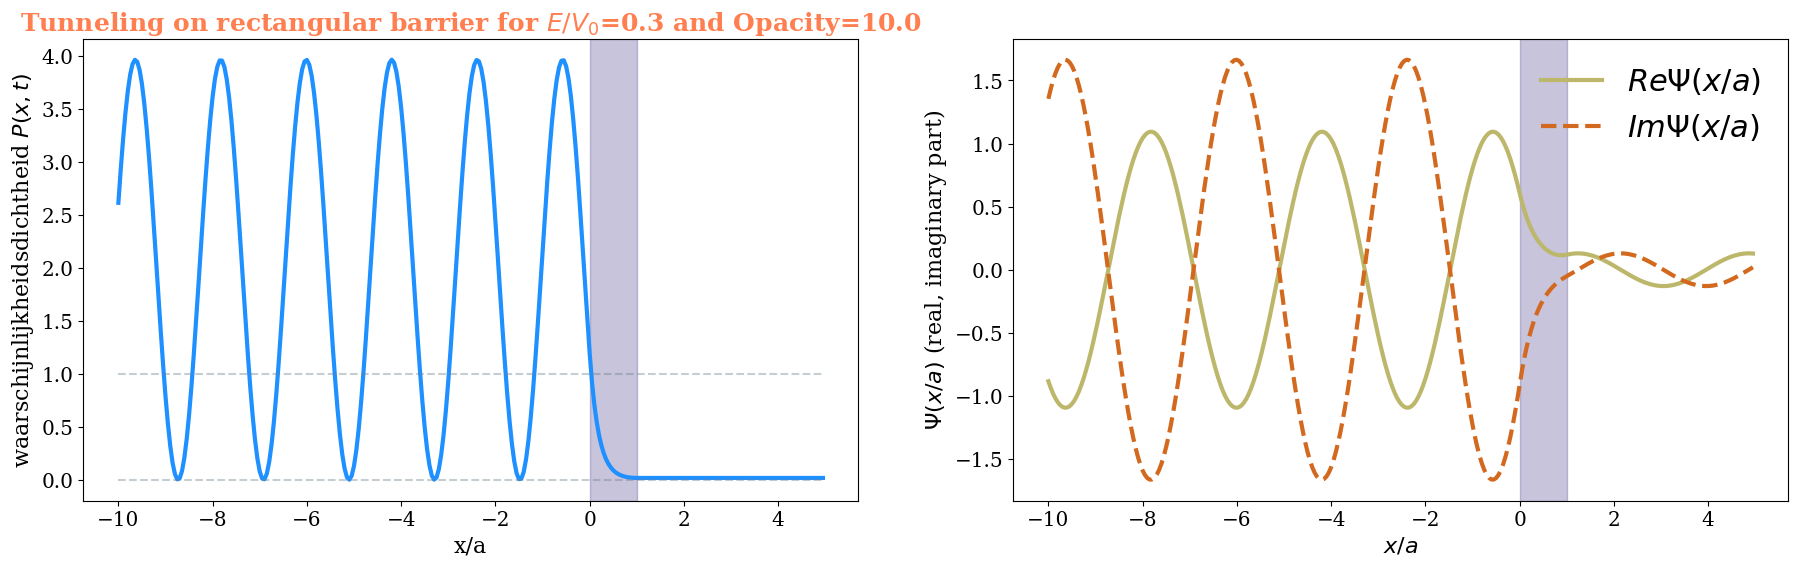

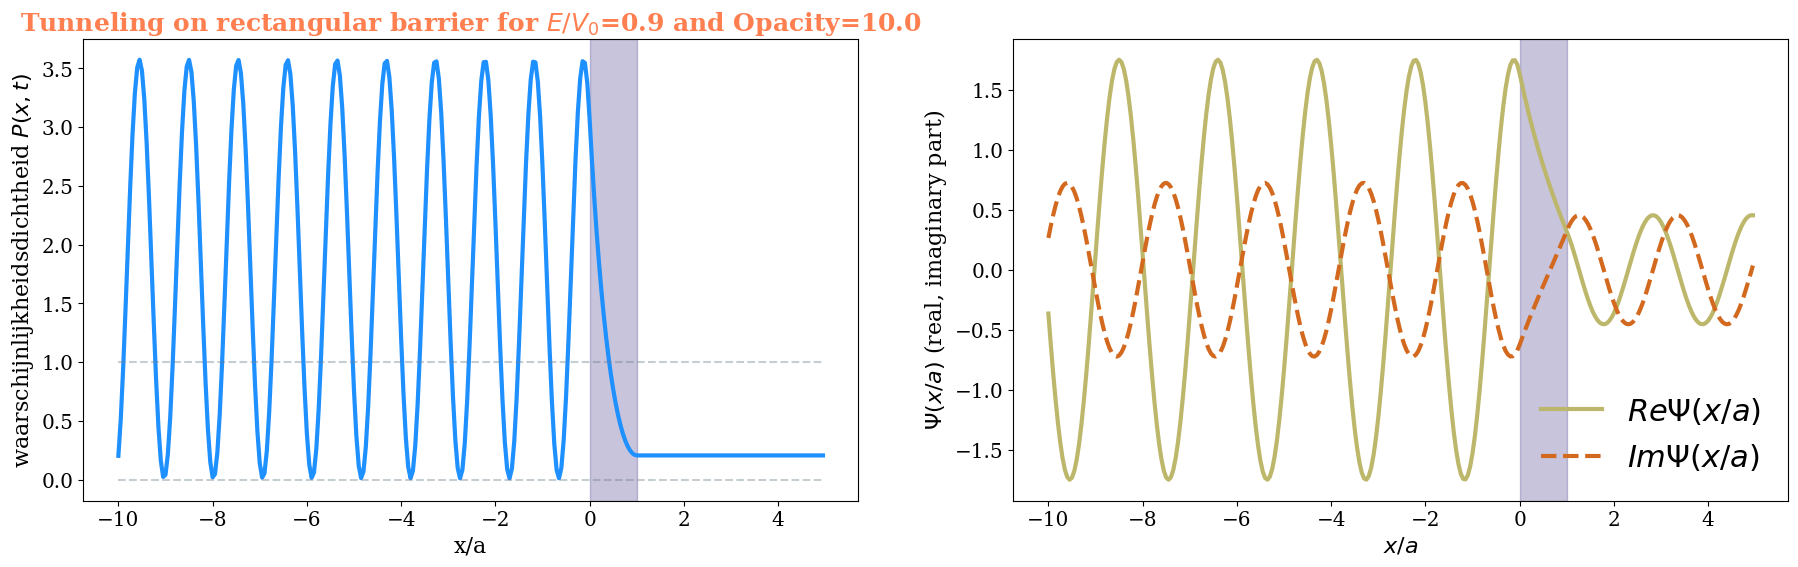

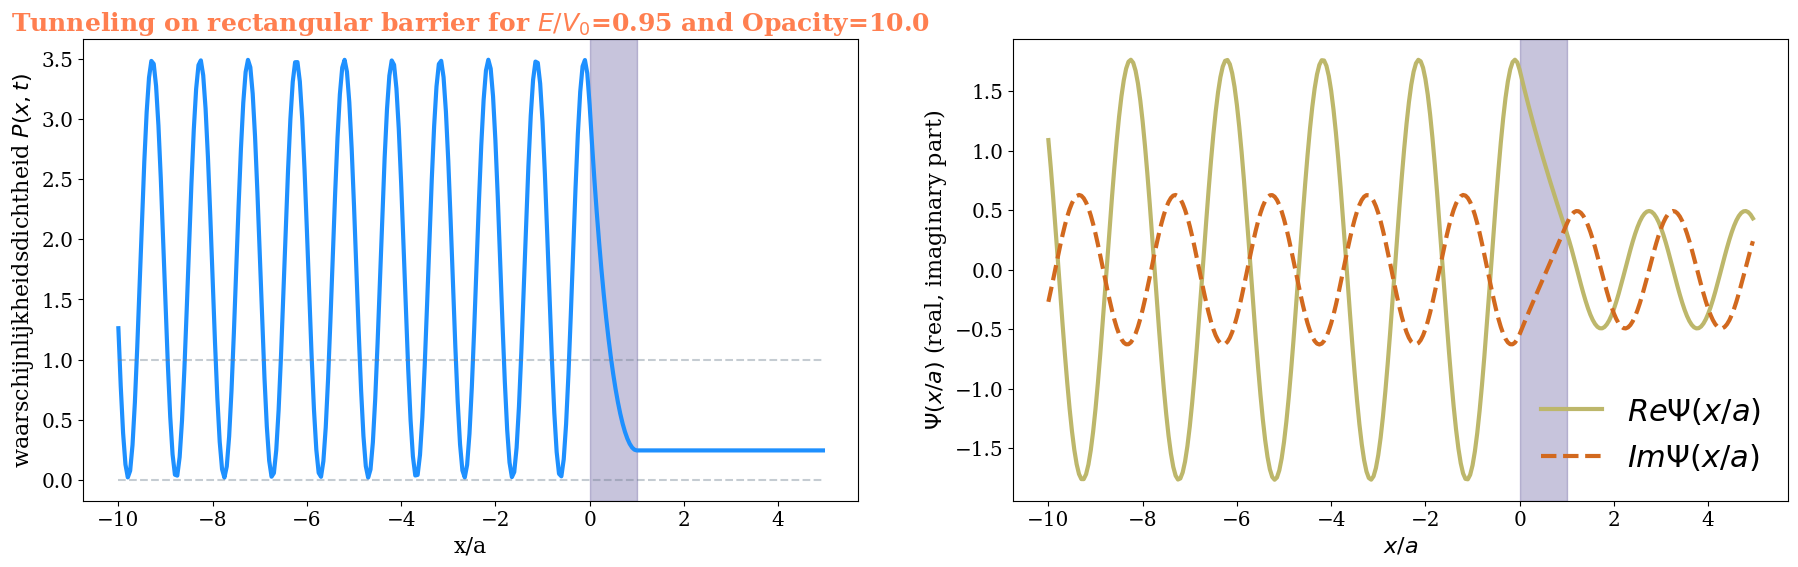

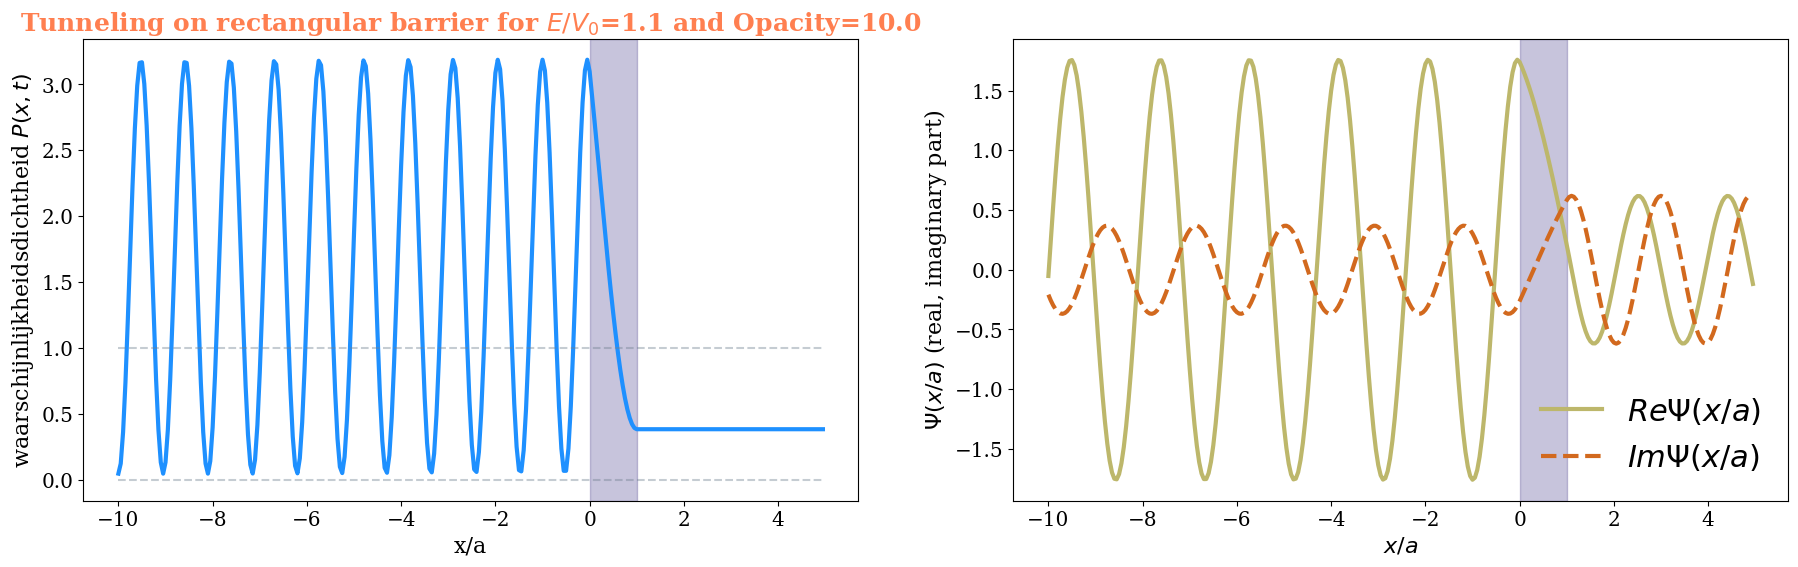

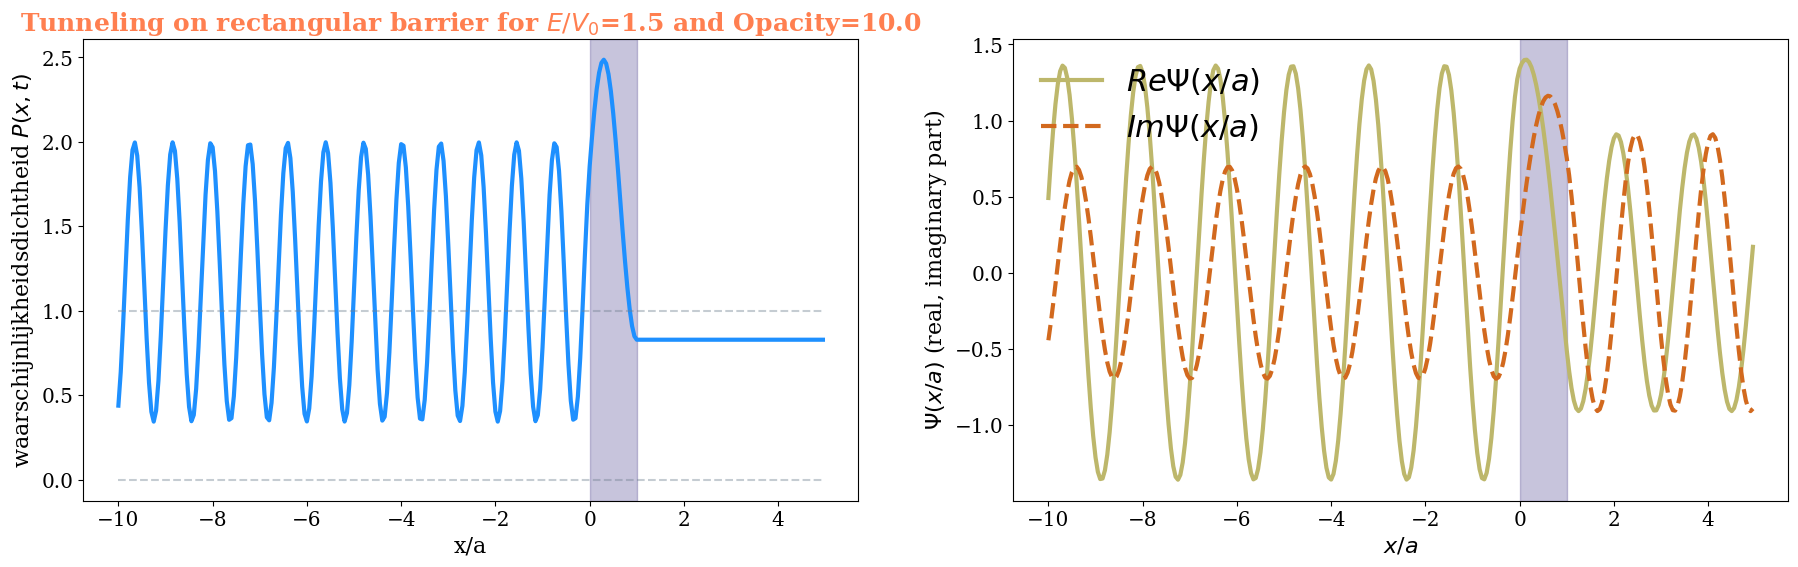

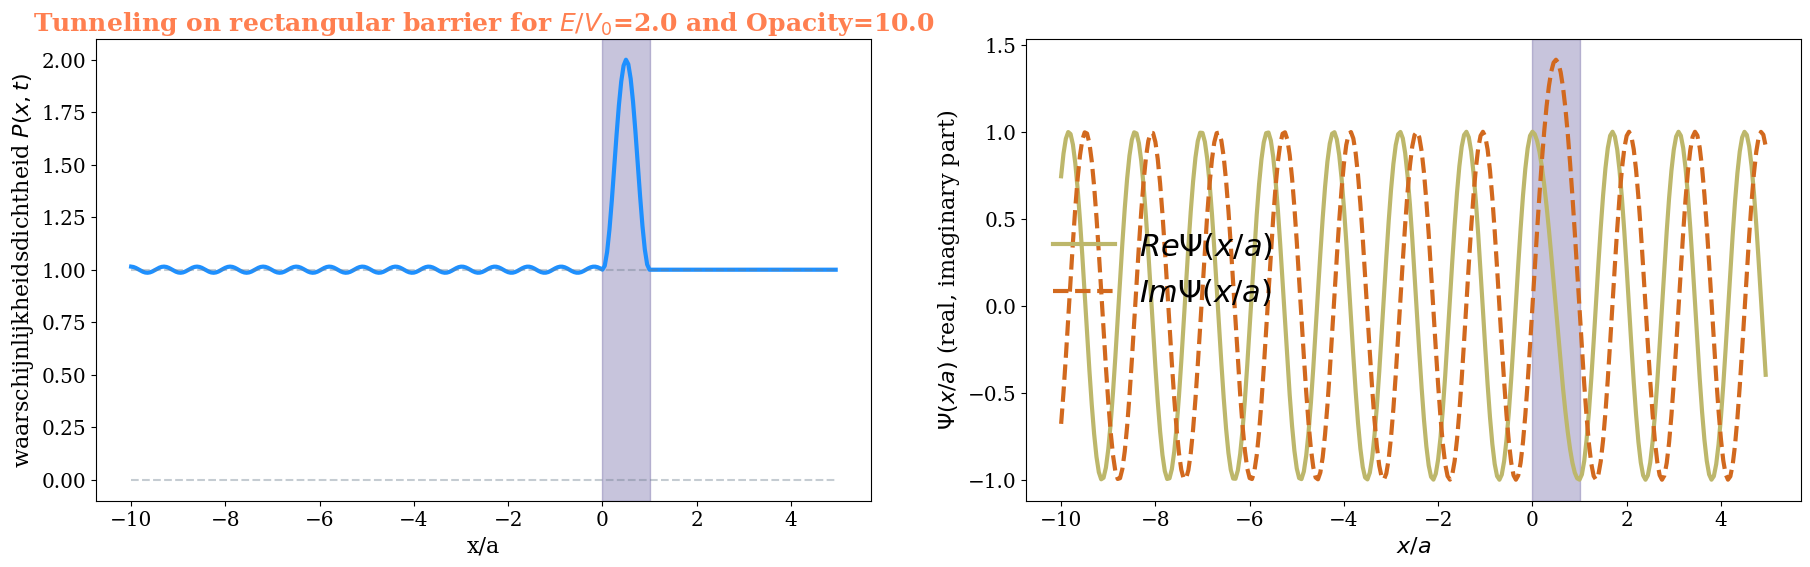

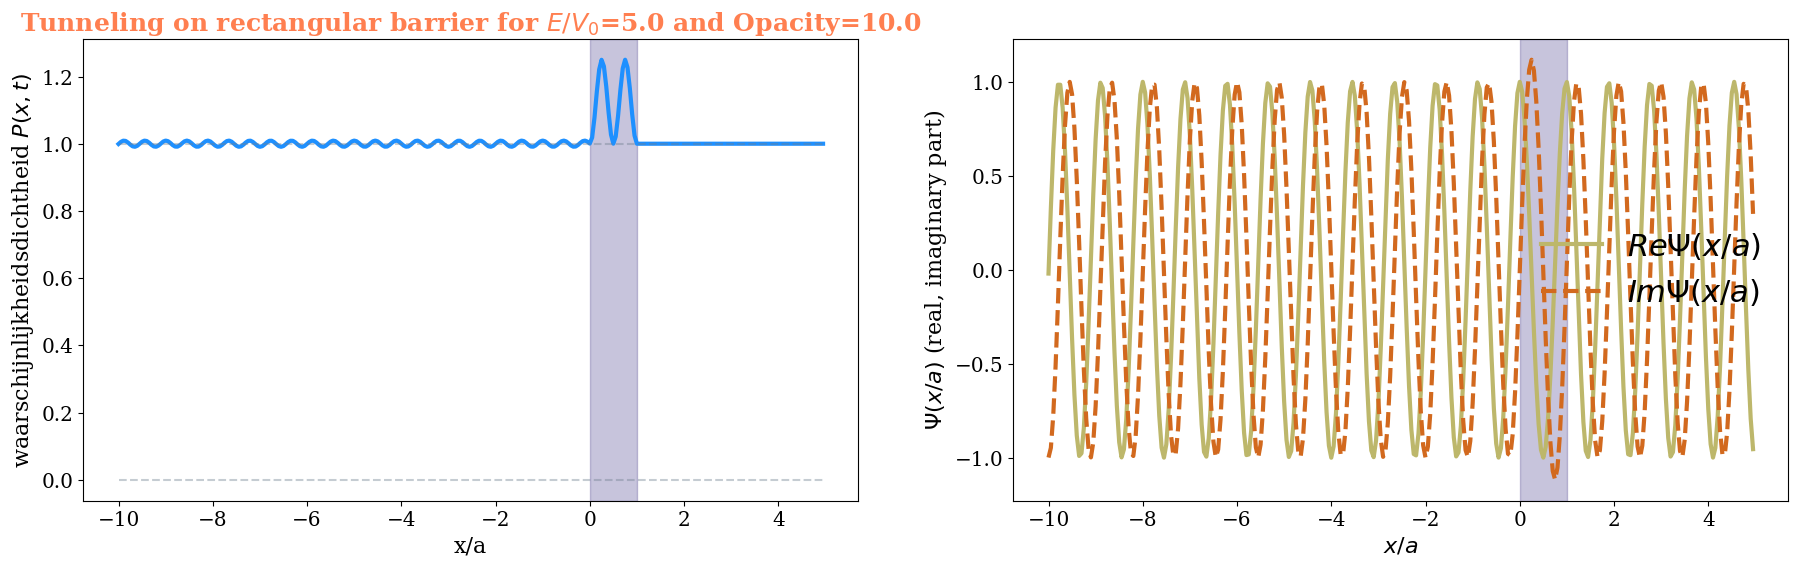

In [49]:
# here we do compute and plot the wavefunction for some selected E/V0 values at given value for opacity

EoverV0sel=np.array([0.3,0.9,0.95,1.1,1.5,2.,5.]) # your own list of E/V_0 values ...
opacity=float(10.) # extreme quantum mechanical situation
for E in EoverV0sel:
     XX,Reflec,Transm=findthecoef(opacity,E,dispfig=1)
